In [2]:
import numpy as np
from numpy import linalg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd
import numpy as np
import utils
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
def data_set_select_genre(df, selected_genres):
    data = df.copy()
    all_genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
    for genre in all_genres:
        if (genre not in selected_genres):
            data = data.drop(data[data['genre'] == genre].index)
    return data

In [40]:
#importing our dataset and spliting into training and testing set

data_set = pd.read_csv('../csv_files/Music_data_set.csv')
genres_df = data_set_select_genre(data_set, ['classical', 'metal', 'jazz'])
genres_df

x = genres_df.drop(['Unnamed: 0', 'song', 'genre'], axis=1)
y = genres_df['genre']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 27) 

print(genres_df.dtypes)     # Prints out the data types associated to each of the fields in the table
genres_df.head()

Unnamed: 0            int64
song                 object
mean_mfccs          float64
mean_chroma_stft    float64
tempo               float64
pulse               float64
flatness            float64
contrast            float64
zero_crossing         int64
genre                object
dtype: object


,Unnamed: 0,song,mean_mfccs,mean_chroma_stft,tempo,pulse,flatness,contrast,zero_crossing,genre
100,100,classical.00000.wav,-6.905348,0.252392,95.703125,0.227010,0.000904,23.383999,65095,classical
101,101,classical.00001.wav,-9.945525,0.214995,117.453835,0.222361,0.000324,25.198185,58180,classical
102,102,classical.00002.wav,-5.381452,0.277958,99.384014,0.234257,0.001094,22.899726,59684,classical
103,103,classical.00003.wav,-8.242496,0.234229,135.999178,0.188784,0.000453,25.674160,72206,classical
104,104,classical.00004.wav,-9.778281,0.221574,107.666016,0.215809,0.000740,25.025198,74800,classical


In [41]:
def prepare_data(ds):
    X_cols = ds[['mean_mfccs', 'mean_chroma_stft', 'tempo', 'pulse', 'flatness', 'contrast']].copy()
    
    X = X_cols.values
    X = X.reshape(len(X_cols),-1)
    
    #We add the dummy x_0
    poly = PolynomialFeatures(1)  
    X = poly.fit_transform(X)
    
    return X

In [42]:
X_clf = prepare_data(x_train)
X_clf_test = prepare_data(x_test)
print(X_clf)


[[ 1.00000000e+00 -2.01623201e+00  4.30214435e-01 ...  1.88685253e-01
   1.10899555e-02  2.12773871e+01]
 [ 1.00000000e+00  6.04832554e+00  4.77006853e-01 ...  2.01544762e-01
   2.57806089e-02  2.06008597e+01]
 [ 1.00000000e+00 -6.20199871e+00  2.85060704e-01 ...  2.17080787e-01
   4.96241788e-04  2.20457212e+01]
 ...
 [ 1.00000000e+00 -1.12654791e+01  3.03265631e-01 ...  1.88159943e-01
   2.75492290e-04  1.93867132e+01]
 [ 1.00000000e+00 -1.19296741e+00  3.92989457e-01 ...  2.53874213e-01
   4.27386463e-02  1.86264179e+01]
 [ 1.00000000e+00 -1.35050726e+01  2.83993155e-01 ...  1.15805008e-01
   6.57111406e-04  2.20149893e+01]]


In [43]:
logreg = utils.fit_logreg(X_clf, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [44]:
print('*************** Estimated parameters: ***********************')
print('[W_0,W] : [',logreg.intercept_,',', logreg.coef_, ']' )

*************** Estimated parameters: ***********************
[W_0,W] : [ [ -0.22564615   8.76612101 -49.77264874] , [[-2.25646149e-01 -4.03784353e-01 -1.87043113e+00  1.69993089e-02
  -9.22869399e+00 -4.39527691e+01 -9.05515050e-02]
 [ 8.76612101e+00  2.80897980e-01 -3.24407423e+01 -1.35257070e-02
   8.00816015e+00  3.59711213e+01 -3.16548610e-01]
 [-4.97726487e+01  5.90612235e-01  1.43936361e+02 -6.90572077e-02
   6.79426106e+01 -2.93913822e+01  1.86408774e+00]] ]


In [45]:
def predict_and_test(model, X_test, y_test):
    '''
    Predicts using a model received as input and then evaluates the accuracy of the predicted data. 
    As inputs it receives the model, an input dataset X_test and the corresponding targets (ground thruth) y_test
    It returs the classification accuracy.
    '''
    y_hat = model.predict(X_test)
    print(y_hat)
    print(np.array(y_test))
    #Your code here
    correct = 0
    for i in range(len(y_hat)):
        if (y_hat[i] == np.array(y_test)[i]):
            compt = 1
        else :
            compt = 0
        correct += compt
    acc = correct / len(y_hat)
    
    return acc

In [46]:
acc = predict_and_test(logreg, X_clf, y_train)

print('*******************  Training accuracy (genre identification) ***************************')
print('ACC: ', acc)
print('*******************************************************************************************')

['metal' 'metal' 'classical' 'metal' 'jazz' 'metal' 'jazz' 'jazz' 'metal'
 'metal' 'metal' 'metal' 'jazz' 'jazz' 'metal' 'metal' 'classical' 'metal'
 'metal' 'jazz' 'classical' 'classical' 'metal' 'metal' 'metal'
 'classical' 'classical' 'classical' 'metal' 'jazz' 'jazz' 'metal' 'metal'
 'metal' 'jazz' 'classical' 'classical' 'metal' 'jazz' 'metal' 'jazz'
 'classical' 'jazz' 'classical' 'classical' 'metal' 'classical' 'metal'
 'jazz' 'metal' 'classical' 'classical' 'jazz' 'metal' 'jazz' 'jazz'
 'jazz' 'jazz' 'metal' 'metal' 'jazz' 'metal' 'metal' 'classical' 'metal'
 'classical' 'jazz' 'metal' 'classical' 'jazz' 'metal' 'classical' 'jazz'
 'jazz' 'classical' 'classical' 'metal' 'jazz' 'metal' 'classical'
 'classical' 'classical' 'jazz' 'metal' 'metal' 'jazz' 'jazz' 'jazz'
 'jazz' 'metal' 'metal' 'jazz' 'metal' 'classical' 'metal' 'jazz'
 'classical' 'classical' 'classical' 'metal' 'jazz' 'classical'
 'classical' 'metal' 'metal' 'jazz' 'classical' 'metal' 'jazz' 'classical'
 'metal' 'cl

In [47]:
def explore_thresholds(model, X, y, thresh):
    '''
    Computes accuracies by varying the cut-off threshold given a model, the input data and a range of thresholds. A ground truth needs to be provided
    to estimate the accuracy
    Works specifically for the Cleveland dataset.
    '''
    y_bool = (y == 'H')
    accs = [(np.sum(y_bool ==  ~(model.predict_proba(X)[:,0] >= t)) / len(y)) for t in thresh]
    
    return accs

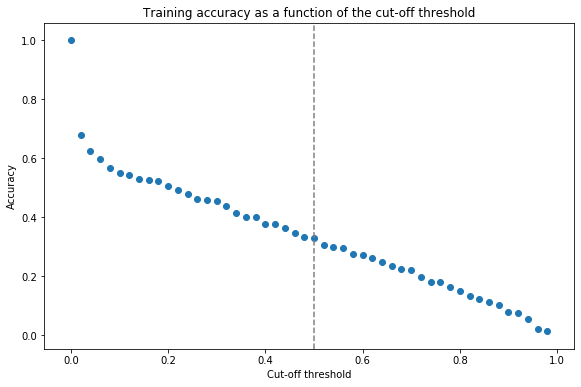

In [48]:
# generate a range of thresholds from 0 to 1.
h=.02
x_min=0.0
x_max=1.0

thresh=np.arange(x_min, x_max, h)
accs = explore_thresholds(logreg, X_clf, y_train, thresh)
plt.rcParams['figure.figsize'] = [9.5, 6]
plt.scatter(thresh, accs)
plt.xlabel('Cut-off threshold')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of the cut-off threshold')
plt.axvline(x=0.5,color='gray', linestyle='--') 
plt.show()

In [49]:
#If you chose a specific threshold value to use as cut-off replace 0.5 with your chosen value (or with any value)
custom_t = 0.4

In [50]:
print('******************  Testing accuracy *********************')
print('ACC: ', predict_and_test(logreg,X_clf_test, y_test))
print('*******************************************************************************************')

#If you chose a specific threshold value to use as cut-off this will be displayed
if custom_t != 0.5:
    print('*********  Testing accuracy with custom cut-off ***********')
    print('ACC: ',explore_thresholds(logreg, X_clf_test, y_test, [custom_t])[0])
    print('*******************************************************************************************')


******************  Testing accuracy *********************
['metal' 'jazz' 'metal' 'classical' 'jazz' 'classical' 'jazz' 'jazz'
 'metal' 'metal' 'jazz' 'metal' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'metal' 'jazz' 'jazz' 'metal' 'metal'
 'classical' 'classical' 'metal' 'jazz' 'classical' 'classical' 'metal'
 'jazz' 'jazz' 'metal' 'classical' 'classical' 'classical' 'classical'
 'metal' 'jazz' 'classical' 'jazz' 'classical' 'classical' 'jazz'
 'classical' 'metal' 'metal' 'jazz' 'classical' 'metal' 'jazz' 'metal'
 'metal' 'classical' 'jazz' 'metal' 'classical' 'metal' 'metal' 'metal']
['metal' 'jazz' 'metal' 'classical' 'jazz' 'classical' 'jazz' 'jazz'
 'metal' 'metal' 'jazz' 'metal' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'metal' 'jazz' 'jazz' 'metal' 'metal'
 'jazz' 'classical' 'metal' 'classical' 'classical' 'jazz' 'metal' 'jazz'
 'classical' 'jazz' 'classical' 'classical' 'jazz' 'classical' 'metal'
 'jazz' 'classical'

In [51]:
#importing our dataset and spliting into training and testing set

genres_df_all = pd.read_csv('../csv_files/Music_data_set.csv')

x2 = genres_df_all.drop(['Unnamed: 0', 'song', 'genre'], axis=1)
y2 = genres_df_all['genre']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 27) 

print(genres_df_all.dtypes)     # Prints out the data types associated to each of the fields in the table
genres_df_all.head()


Unnamed: 0            int64
song                 object
mean_mfccs          float64
mean_chroma_stft    float64
tempo               float64
pulse               float64
flatness            float64
contrast            float64
zero_crossing         int64
genre                object
dtype: object


,Unnamed: 0,song,mean_mfccs,mean_chroma_stft,tempo,pulse,flatness,contrast,zero_crossing,genre
0,0,blues.00000.wav,1.938016,0.350088,123.046875,0.274049,0.004498,20.526699,55031,blues
1,1,blues.00001.wav,-0.055611,0.340914,107.666016,0.268452,0.002298,20.676128,37139,blues
2,2,blues.00002.wav,1.034164,0.363637,161.499023,0.264260,0.002631,22.197517,50563,blues
3,3,blues.00003.wav,0.071344,0.404785,172.265625,0.259775,0.000954,21.426268,22077,blues
4,4,blues.00004.wav,-8.458839,0.308526,135.999178,0.213662,0.003238,21.466338,67225,blues


In [52]:
X_clf2 = prepare_data(x_train2)
X_clf_test2 = prepare_data(x_test2)
print(X_clf2)

logreg2 = utils.fit_logreg(X_clf2, y_train2)


[[ 1.00000000e+00 -8.87237072e+00  2.79348701e-01 ...  1.61485776e-01
   1.73513219e-03  2.10026178e+01]
 [ 1.00000000e+00 -1.37861598e+00  2.90966302e-01 ...  2.62671947e-01
   1.27946688e-02  2.00832187e+01]
 [ 1.00000000e+00  3.51899099e+00  4.72920150e-01 ...  1.88005611e-01
   6.07267953e-02  1.84147952e+01]
 ...
 [ 1.00000000e+00 -1.71948071e+01  3.02542984e-01 ...  1.73864454e-01
   6.61977287e-03  2.13391155e+01]
 [ 1.00000000e+00  5.23638296e+00  5.18381894e-01 ...  2.10201874e-01
   1.42971519e-02  2.06574969e+01]
 [ 1.00000000e+00 -3.21365094e+00  2.57324815e-01 ...  2.21485987e-01
   6.41589402e-04  2.14862664e+01]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [53]:
def dummy_model(X):
    '''
    Returns a zero (no disease) no matter the input
    '''
    return np.array(['blues']*(len(X)))

In [54]:
y_test_dummy = dummy_model(X_clf_test2)
acc_dummy = predict_and_test(logreg2, X_clf_test2, y_test_dummy)

acc_test = predict_and_test(logreg2, X_clf_test2, y_test2)
print('******************  Testing accuracy *********************')
print('ACC multinomial: ', acc_test)
print('ACC dummy: ', acc_dummy)


['pop' 'pop' 'jazz' 'blues' 'hiphop' 'hiphop' 'jazz' 'pop' 'hiphop' 'pop'
 'blues' 'metal' 'pop' 'pop' 'reggae' 'jazz' 'hiphop' 'blues' 'blues'
 'classical' 'classical' 'reggae' 'classical' 'pop' 'reggae' 'blues'
 'disco' 'jazz' 'pop' 'pop' 'jazz' 'pop' 'blues' 'reggae' 'hiphop' 'jazz'
 'blues' 'classical' 'country' 'classical' 'classical' 'country' 'blues'
 'classical' 'pop' 'hiphop' 'disco' 'reggae' 'classical' 'blues' 'blues'
 'jazz' 'jazz' 'pop' 'country' 'metal' 'jazz' 'pop' 'blues' 'classical'
 'pop' 'metal' 'hiphop' 'jazz' 'pop' 'country' 'hiphop' 'reggae' 'jazz'
 'blues' 'pop' 'disco' 'hiphop' 'blues' 'jazz' 'metal' 'classical' 'pop'
 'disco' 'metal' 'classical' 'reggae' 'classical' 'pop' 'country' 'pop'
 'reggae' 'hiphop' 'disco' 'pop' 'metal' 'disco' 'jazz' 'classical'
 'blues' 'classical' 'pop' 'pop' 'classical' 'metal' 'metal' 'hiphop'
 'jazz' 'jazz' 'classical' 'blues' 'blues' 'classical' 'pop' 'metal'
 'metal' 'hiphop' 'jazz' 'classical' 'jazz' 'metal' 'pop' 'reggae'
 'cl